In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import sklearn
import pandas as pd

In [2]:
print("Torch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("Is CUDA available:", torch.cuda.is_available())

Torch version: 2.5.1+cu121
CUDA version: 12.1
Is CUDA available: True


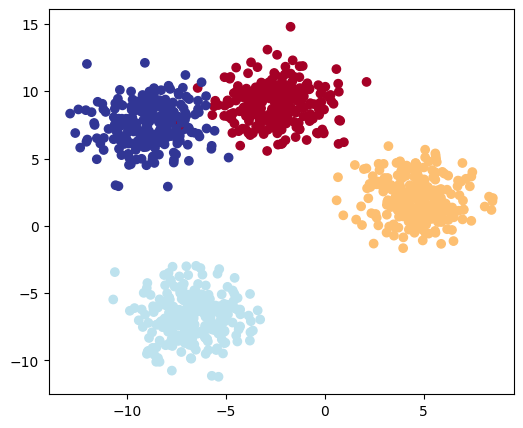

In [15]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

X_blob, y_blob = make_blobs(n_samples = 1000, n_features=NUM_FEATURES, 
                            centers=NUM_CLASSES, cluster_std= 1.5, random_state=RANDOM_SEED)

#create tnesors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size= 0.2, random_state=RANDOM_SEED)

plt.figure(figsize= (6,5))
plt.scatter(x = X_blob[:, 0], y = X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

In [ ]:
class BlobModel(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 nn.Linear Layers 
        self.three_linear_layers = nn.Sequential(
            nn.Linear(in_features= 2, out_features= 16), #takes in 2 and outputs 5
            nn.ReLU(),
            nn.Linear(in_features= 16, out_features= 32), #inputs 10, outputs 10
            nn.ReLU(),
            nn.Linear(in_features= 32, out_features= 1), #inputs 10, outputs 1
            )
    #foward method
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.three_linear_layers(x) # x -> layer1 -> layer 2 -> output

#instantitae an instance of model
model_1 = BlobModel().to(DEVICE)
model_1